Missing Values Before Cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values After Cleaning:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


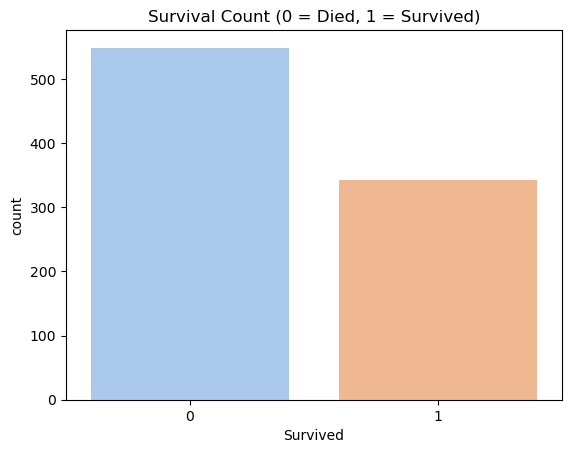

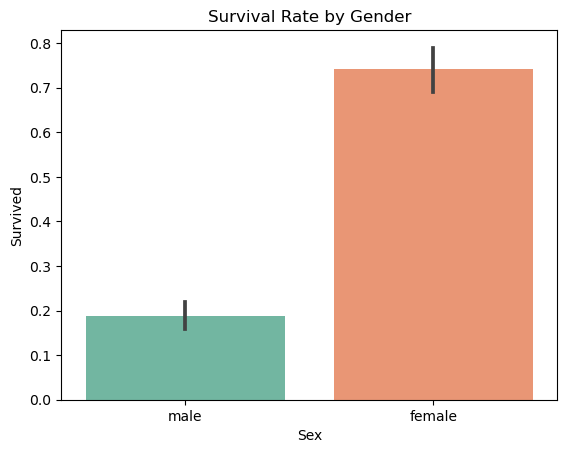

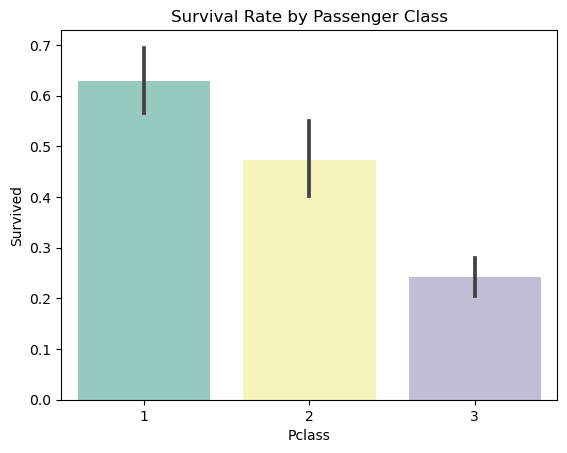

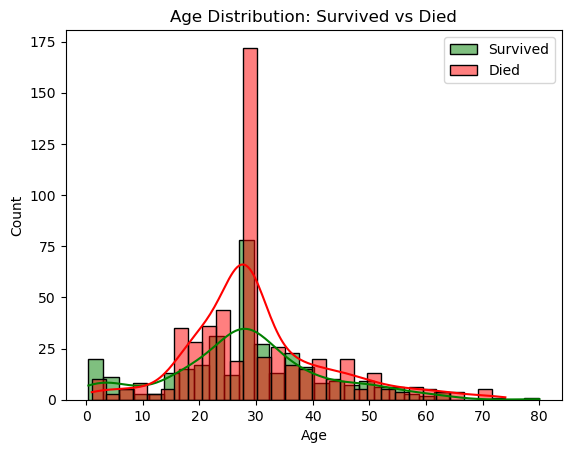

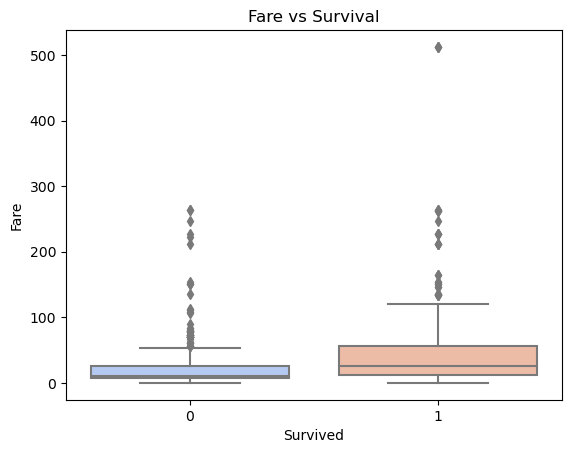

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

zip_path = "C:/Users/hp/Downloads/titanic.zip"   
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("titanic_data")


df = pd.read_csv("titanic_data/train.csv")


print("Missing Values Before Cleaning:\n", df.isnull().sum())


df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])   
df["Age"].fillna(df["Age"].median(), inplace=True)                 
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)      

print("\nMissing Values After Cleaning:\n", df.isnull().sum())


# perform EDA


#  Survival Count
sns.countplot(x="Survived", data=df, palette="pastel")
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

# Survival by Gender
sns.barplot(x="Sex", y="Survived", data=df, palette="Set2")
plt.title("Survival Rate by Gender")
plt.show()

# Survival by Passenger Class
sns.barplot(x="Pclass", y="Survived", data=df, palette="Set3")
plt.title("Survival Rate by Passenger Class")
plt.show()

# Age Distribution by Survival
sns.histplot(df[df["Survived"]==1]["Age"], bins=30, color="green", label="Survived", kde=True)
sns.histplot(df[df["Survived"]==0]["Age"], bins=30, color="red", label="Died", kde=True)
plt.legend()
plt.title("Age Distribution: Survived vs Died")
plt.show()

# Survival by Fare
sns.boxplot(x="Survived", y="Fare", data=df, palette="coolwarm")
plt.title("Fare vs Survival")
plt.show()
